In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
league_avgs = pd.read_excel('C:/Users/KMGre/Documents/DA8/Projects/kevin_da8_capstone/data/league_averages.xlsx')
league_avgs

,Rk,Season,Lg,GP,G,PP,PPO,PP%,PK%,SA,SV,SV%,GAA
0,1,2022-23,NHL,1312,3.18,0.65,3.07,21.31,78.69,31.1,28.1,0.904,2.97
1,2,2021-22,NHL,1312,3.14,0.60,2.89,20.61,79.39,31.4,28.5,0.907,2.92
2,3,2020-21,NHL,868,2.94,0.57,2.89,19.78,80.22,29.8,27.1,0.908,2.74
3,4,2019-20,NHL,1082,3.02,0.60,2.97,20.03,79.97,31.3,28.4,0.910,2.82
4,5,2018-19,NHL,1271,3.01,0.58,2.92,19.78,80.22,31.3,28.5,0.910,2.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,101,1921-22,NHL,48,3.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.88
101,102,1920-21,NHL,48,4.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.19
102,103,1919-20,NHL,48,4.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.70
103,104,1918-19,NHL,27,4.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.05


In [8]:
league_new = league_avgs[league_avgs["Season"] > '1980-1981']
league_new

,Rk,Season,Lg,GP,G,PP,PPO,PP%,PK%,SA,SV,SV%,GAA
0,1,2022-23,NHL,1312,3.18,0.65,3.07,21.31,78.69,31.1,28.1,0.904,2.97
1,2,2021-22,NHL,1312,3.14,0.60,2.89,20.61,79.39,31.4,28.5,0.907,2.92
2,3,2020-21,NHL,868,2.94,0.57,2.89,19.78,80.22,29.8,27.1,0.908,2.74
3,4,2019-20,NHL,1082,3.02,0.60,2.97,20.03,79.97,31.3,28.4,0.910,2.82
4,5,2018-19,NHL,1271,3.01,0.58,2.92,19.78,80.22,31.3,28.5,0.910,2.81
5,6,2017-18,NHL,1271,2.97,0.61,3.04,20.18,79.82,31.8,29.0,0.912,2.78
6,7,2016-17,NHL,1230,2.77,0.57,2.99,19.10,80.90,30.1,27.5,0.913,2.59
7,8,2015-16,NHL,1230,2.71,0.58,3.11,18.66,81.34,29.6,27.1,0.915,2.51
8,9,2014-15,NHL,1230,2.73,0.57,3.06,18.66,81.34,29.8,27.3,0.915,2.52
9,10,2013-14,NHL,1230,2.74,0.59,3.27,17.89,82.11,30.0,27.4,0.914,2.56


<AxesSubplot:xlabel='G', ylabel='Season'>

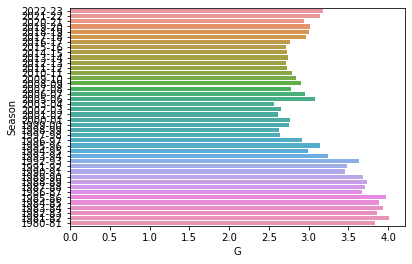

In [9]:
sns.barplot(data=league_new, x="G", y="Season")

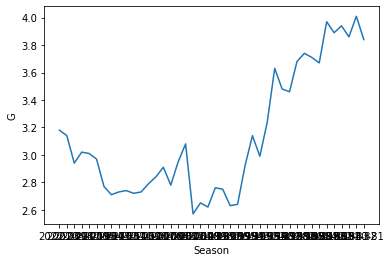

In [34]:
sns.lineplot( x = "Season",
             y = "G",
             data = league_new);

In [25]:
df_1980 = league_new[league_new['Season'].between('1980-81', '1990-91')]
df_1990 = league_new[league_new['Season'].between('1990-91', '1999-00')]
df_2000 = league_new[league_new['Season'].between('2000-01', '2010-11')]
df_2010 = league_new[league_new['Season'].between('2010-11', '2019-20')]
df_20201 = league_new[league_new["Season"] > '2019-20']
df_2020 = df_20201[df_20201["Season"] > '2020-21']
df_2020

,Rk,Season,Lg,GP,G,PP,PPO,PP%,PK%,SA,SV,SV%,GAA
0,1,2022-23,NHL,1312,3.18,0.65,3.07,21.31,78.69,31.1,28.1,0.904,2.97
1,2,2021-22,NHL,1312,3.14,0.60,2.89,20.61,79.39,31.4,28.5,0.907,2.92


In [31]:
g_2020 = df_2020.loc[:, 'G'].mean()
g_2010 = df_2010.loc[:, 'G'].mean()
g_2000 = df_2000.loc[:, 'G'].mean()
g_1990 = df_1990.loc[:, 'G'].mean()
g_1980 = df_1980.loc[:, 'G'].mean()
g_1980

3.797272727272727

In [32]:
data = [['1980s', g_1980], ['1990s', g_1990], ['2000s', g_2000], ['2010s', g_2010], ['2020s', g_2020]]
goals_by_decade = pd.DataFrame(data, columns=['Decade', 'Goals'])
goals_by_decade

,Decade,Goals
0,1980s,3.797273
1,1990s,3.088000
2,2000s,2.795000
3,2010s,2.819000
4,2020s,3.160000


<AxesSubplot:xlabel='Decade', ylabel='Goals'>

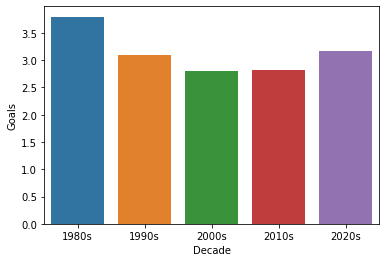

In [33]:
sns.barplot(data=goals_by_decade, x="Decade", y="Goals")

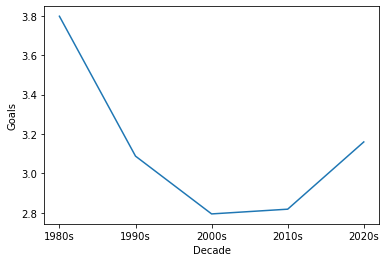

In [36]:
sns.lineplot( x = "Decade",
             y = "Goals",
             data = goals_by_decade);

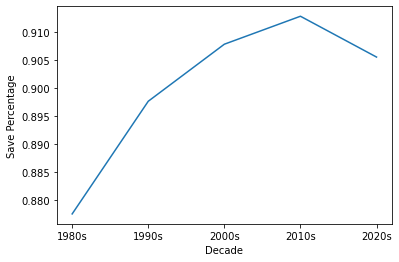

In [44]:
df_1980_sv = league_new[league_new['Season'].between('1980-81', '1990-91')]
df_1990_sv = league_new[league_new['Season'].between('1990-91', '1999-00')]
df_2000_sv = league_new[league_new['Season'].between('2000-01', '2010-11')]
df_2010_sv = league_new[league_new['Season'].between('2010-11', '2019-20')]
df_2020_sv1 = league_new[league_new["Season"] > '2019-20']
df_2020_sv = df_2020_sv1[df_20201["Season"] > '2020-21']

sv_2020 = df_2020_sv.loc[:, 'SV%'].mean()
sv_2010 = df_2010_sv.loc[:, 'SV%'].mean()
sv_2000 = df_2000_sv.loc[:, 'SV%'].mean()
sv_1990 = df_1990_sv.loc[:, 'SV%'].mean()
sv_1980 = df_1980_sv.loc[:, 'SV%'].mean()

data1 = [['1980s', sv_1980], ['1990s', sv_1990], ['2000s', sv_2000], ['2010s', sv_2010], ['2020s', sv_2020]]
sv_by_decade = pd.DataFrame(data1, columns=['Decade', 'Save Percentage'])
sv_by_decade

sns.lineplot( x = "Decade",
             y = "Save Percentage",
             data = sv_by_decade);

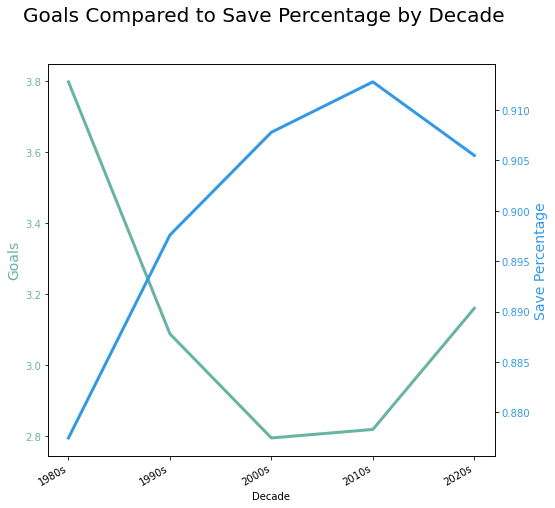

In [51]:
color1 = "#69b3a2"
color2 = "#3399e6"
fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

ax1.plot(['1980s', '1990s', '2000s', '2010s', '2020s'], [g_1980, g_1990, g_2000, g_2010, g_2020], color=color1, lw=3)
ax2.plot(['1980s', '1990s', '2000s', '2010s', '2020s'], [sv_1980, sv_1990, sv_2000, sv_2010, sv_2020], color=color2, lw=3)

ax1.set_xlabel("Decade")
ax1.set_ylabel("Goals", color=color1, fontsize=14)
ax1.tick_params(axis="y", labelcolor=color1)

ax2.set_ylabel("Save Percentage", color=color2, fontsize=14)
ax2.tick_params(axis="y", labelcolor=color2)

fig.suptitle("Goals Compared to Save Percentage by Decade", fontsize=20)
fig.autofmt_xdate()